In [1]:
from pathlib import Path

import pandas as pd

In [5]:
rootdir = Path("/scratch/jetzeschuurman/imagenet/logs/efficientnet_b2-256-tucker-0.75-k1x1/")
exp_0 = "20211220-125526"
exp_3 = "20211220-182532"
exp_4 = "20211220-203454"

sum_0 = pd.read_csv(rootdir/exp_0/"summary.csv")
sum_3 = pd.read_csv(rootdir/exp_3/"summary.csv")
sum_4 = pd.read_csv(rootdir/exp_4/"summary.csv")


m_sum_0 = pd.read_csv(rootdir/exp_0/"micro_summary.csv") # TODO this file is a mess
m_sum_3 = pd.read_csv(rootdir/exp_3/"micro_summary.csv", header=None)
m_sum_4 = pd.read_csv(rootdir/exp_4/"micro_summary.csv", header=None)


In [6]:
sum_0.set_index('epoch', inplace=True)
sum_3.set_index('epoch', inplace=True)
sum_4.set_index('epoch', inplace=True)


In [7]:
summary = sum_0.append(sum_3).append(sum_4)

In [8]:
summary

,train_loss,eval_loss,eval_top1,eval_top5
epoch,,,,
0,5.402969,3.493483,28.702737,53.972277
1,4.675562,2.987208,37.037638,63.202143
2,4.429930,2.716685,41.835920,67.830814
3,4.270577,2.573699,44.447757,70.085243
4,4.110983,2.469769,46.209901,71.643900
5,4.099611,2.407274,47.580995,72.982523
6,4.027921,2.335200,48.970197,74.104937
7,4.002997,2.307409,49.716782,74.689873
8,3.956446,2.252005,50.817965,75.522707


<AxesSubplot:xlabel='epoch', ylabel='loss'>

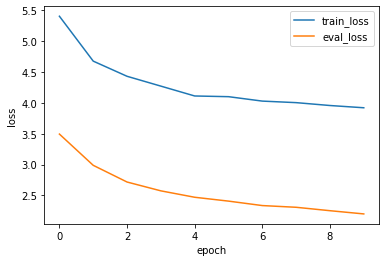

In [9]:
summary[['train_loss', 'eval_loss']].plot(ylabel='loss')

<AxesSubplot:xlabel='epoch', ylabel='accuracy (%)'>

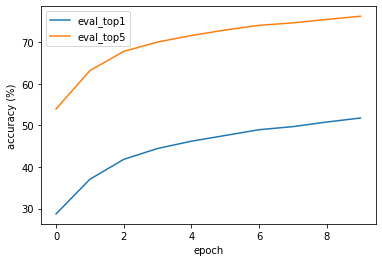

In [10]:
summary[['eval_top1','eval_top5']].plot(ylabel='accuracy (%)')

In [11]:
m_sum_0.set_index('update_step', inplace=True)

In [12]:
m_sum_3.rename(columns={0:'update_step', 1:'micro_train_loss'}, inplace=True)
m_sum_3.set_index('update_step', inplace=True)

In [13]:
m_sum_4.rename(columns={0:'update_step', 1:'micro_train_loss'}, inplace=True)
m_sum_4.set_index('update_step', inplace=True)

In [14]:
m_sum = m_sum_0.append(m_sum_3).append(m_sum_4)

<AxesSubplot:xlabel='update step', ylabel='loss'>

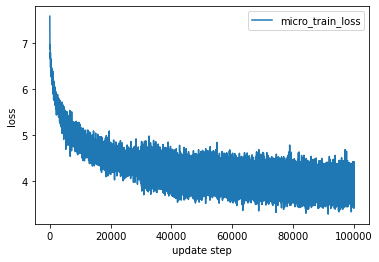

In [15]:
m_sum[['micro_train_loss']].plot(ylabel='loss', xlabel='update step')